# Logistic Regression

I decided to treat this as a classification problem by creating a new binary variable  affair  (did  the  woman  have  at  least  one  affair?)  and  trying  to predict the classification for each woman.DatasetThe  dataset  I  chose  is  the  affairs  dataset  that  comes  with  Statsmodels.  

It was  derived  from  a  survey  of  women  in  1974  by  Redbook  magazine,  in which  married  women  were  asked  about  their  participation  in  extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ:  level  of  education  (9  =  grade  school,  12  =  high  school,  14  = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [1]:
pip install "patsy==0.5.1"

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [8]:
# Loading the dataset and reading the first 5 records
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
# adding affair column and representing if the dta['affairs']>0 as 1, if not then 0

dta['affair'] = (dta['affairs']>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
# Finding the statistical information in the dataset
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [12]:
# Finding the information of the dataset
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [13]:
# Finding the null values in the dataset
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

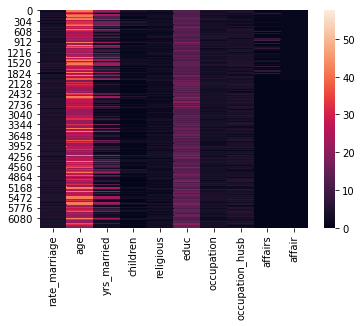

In [15]:
# Finding the correlation values in heat map
sns.heatmap(data=dta)

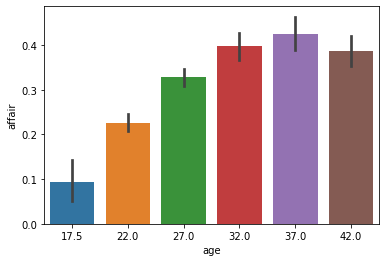

In [17]:
sns.barplot(x='age', y='affair', data=dta)

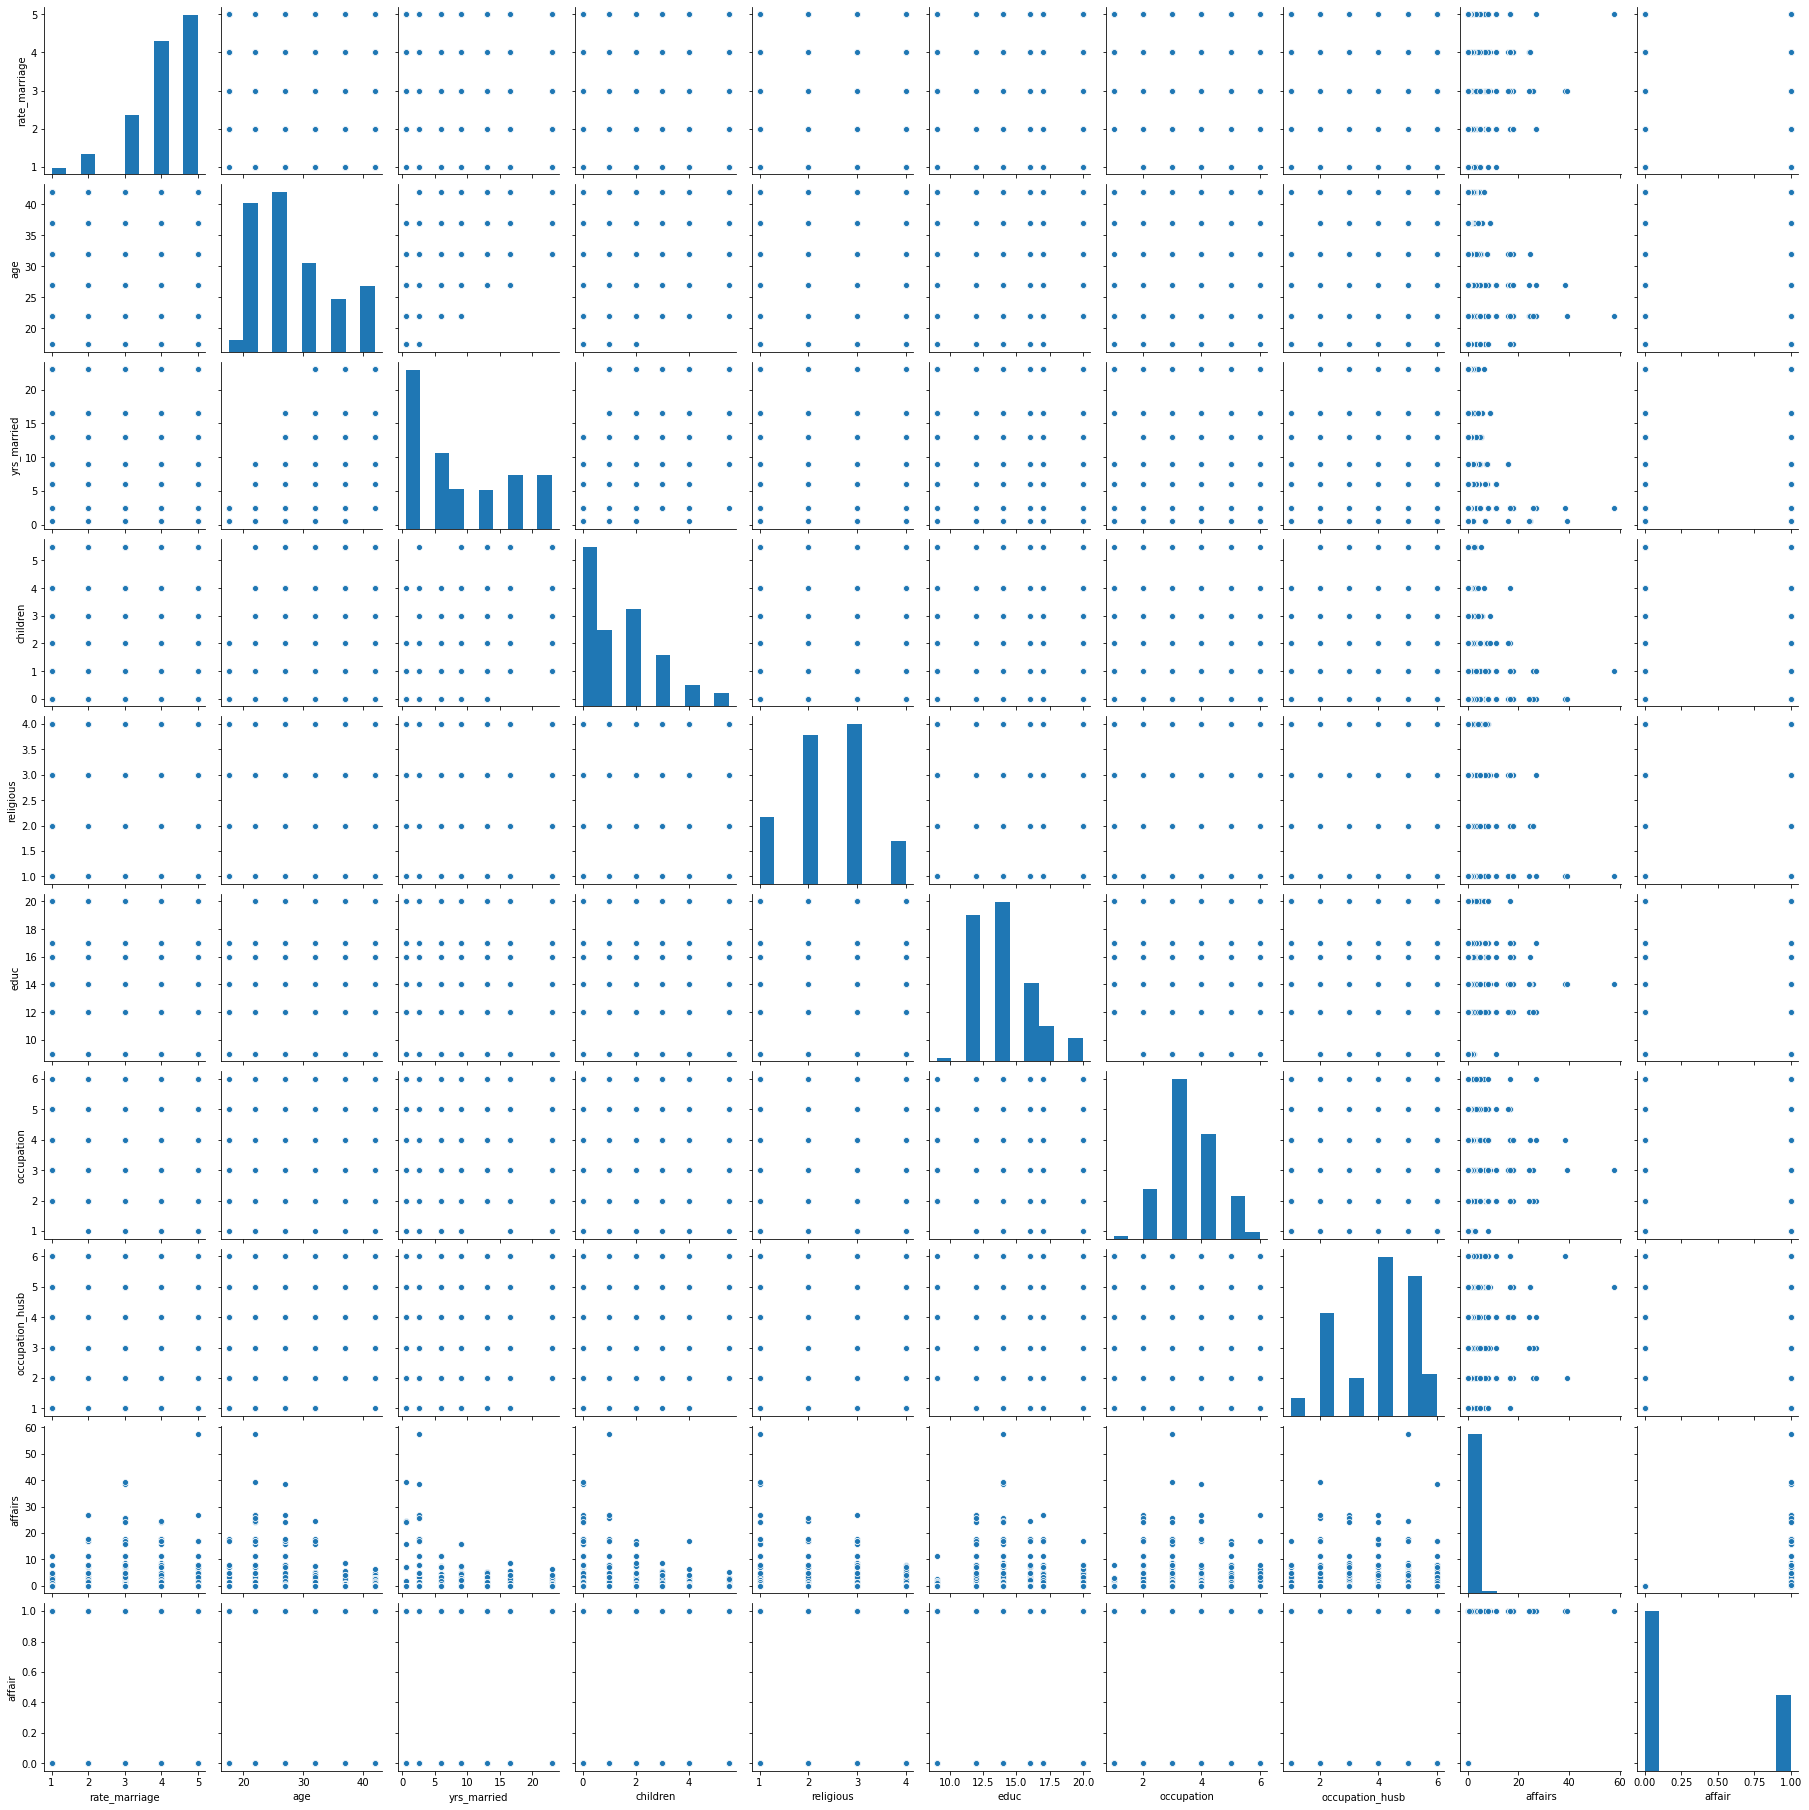

In [18]:
sns.pairplot(data=dta)

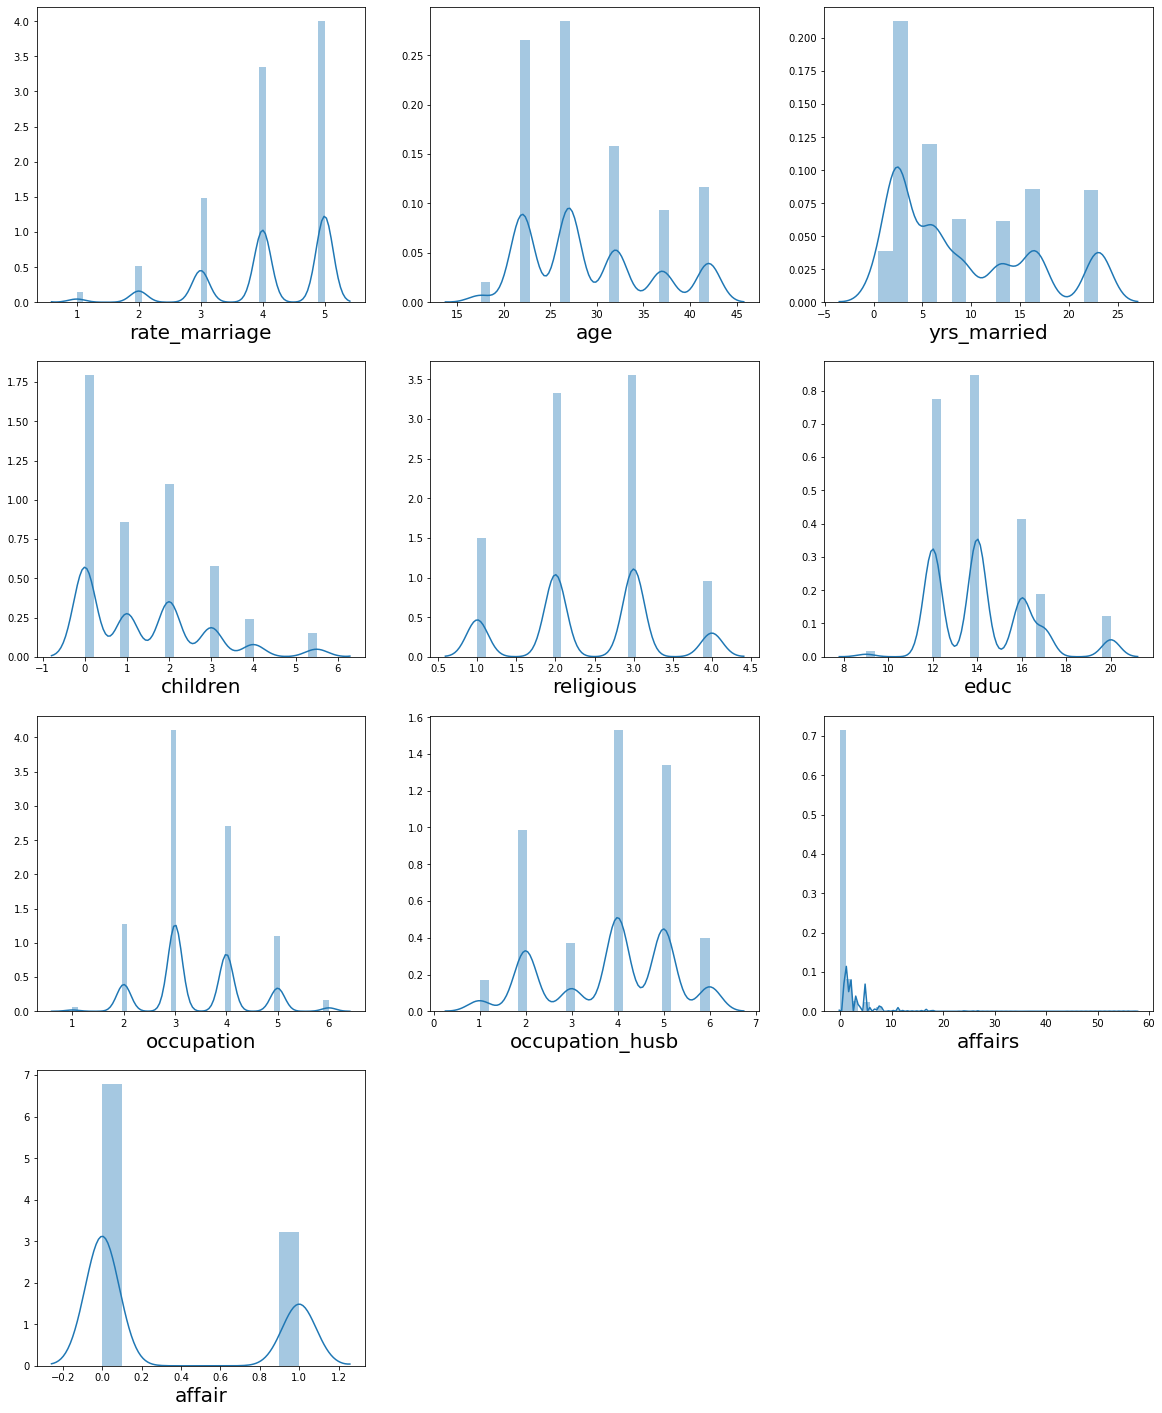

In [20]:
# Finding data set is nornally distributed or not

plt.figure(figsize=(20,25), facecolor='white')
plotnumber= 1

for col in dta:
    if plotnumber <=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(dta[col])
        plt.xlabel(col, fontsize=20)
    plotnumber +=1
plt.show()

Text(0, 0.5, 'Frequency')

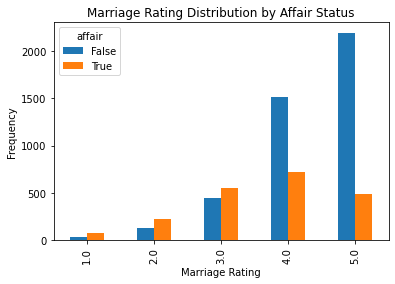

In [22]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [24]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [25]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [26]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [27]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [28]:
# Renaming the X columns
X.rename(columns=
        {
         'C(occupation)[T.2.0]':'occ_2',
         'C(occupation)[T.3.0]':'occ_3',
         'C(occupation)[T.4.0]':'occ_4',
         'C(occupation)[T.5.0]':'occ_5',
         'C(occupation)[T.6.0]':'occ_6',
         'C(occupation_husb)[T.2.0]':'occ_husb_2',
         'C(occupation_husb)[T.3.0]':'occ_husb_3',
         'C(occupation_husb)[T.4.0]':'occ_husb_4',
         'C(occupation_husb)[T.5.0]':'occ_husb_5',
         'C(occupation_husb)[T.6.0]':'occ_husb_6'
        }
        )

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [30]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

# Logistic Regression

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 100, test_size=0.3)
print("X_train is: ", X_train)
print("Y_train is: ", Y_train)
print("X_test: ", X_test)
print("Y_test: ", Y_test)

X_train is:        Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
4831        1.0                   0.0                   1.0   
1408        1.0                   0.0                   1.0   
4843        1.0                   0.0                   0.0   
14          1.0                   0.0                   0.0   
6289        1.0                   0.0                   1.0   
...         ...                   ...                   ...   
6026        1.0                   1.0                   0.0   
79          1.0                   1.0                   0.0   
3927        1.0                   0.0                   0.0   
5955        1.0                   0.0                   0.0   
5640        1.0                   0.0                   1.0   

      C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
4831                   0.0                   0.0                   0.0   
1408                   0.0                   0.0                   0.0   
4843    

In [37]:
print(X_train.shape)
print(Y_train.shape)

(4456, 17)
(4456,)


In [38]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
prediction = log_reg.predict(X_test)
prediction

array([0., 0., 0., ..., 1., 0., 0.])

In [40]:
log_prediction = log_reg.predict_log_proba(X_test)
log_prediction

array([[-0.08036547, -2.56108429],
       [-0.24014549, -1.54418131],
       [-0.34307443, -1.23644569],
       ...,
       [-1.05430419, -0.42837779],
       [-0.38727195, -1.13602274],
       [-0.48583501, -0.95498816]])

In [43]:
accuracy = accuracy_score(Y_test, prediction)
accuracy

0.7193717277486911

# Logistic Regression Evaluationg Model

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [44]:
conf_mat = confusion_matrix(Y_test, prediction)
conf_mat

array([[1172,  114],
       [ 422,  202]], dtype=int64)

In [45]:
# From the above confusion matrix, we assigning values for True Positve, False Positive, True Negative, False Negative
True_Positive=conf_mat[0][0]
False_Positive=conf_mat[0][1]
False_Negative=conf_mat[1][0]
True_Negative=conf_mat[1][1]

In [46]:
# Evaluation using Accuracy 
Accuracy = (True_Positive + True_Negative) / (True_Positive +False_Positive + False_Negative + True_Negative)
Accuracy

0.7193717277486911

In [47]:
# Evaluation using Recall
Recall = (True_Positive)/(True_Positive+False_Negative)
Recall

0.7352572145545797

In [48]:
# Evaluation using Precision
Precision = (True_Positive) / (True_Positive + False_Positive)
Precision

0.911353032659409

In [49]:
# Evaluation using F1_Score
F1_Score = (2*Precision*Recall)/(Precision+Recall)
F1_Score

0.8138888888888889

In [51]:
# Evaluation using AUC (Area Under Curve)
AUC = roc_auc_score(Y_test,prediction)
AUC

0.6175354906886789

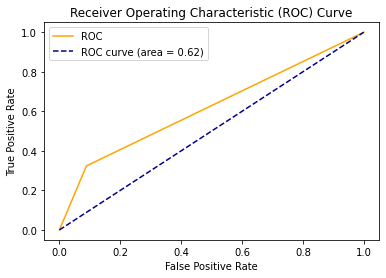

In [52]:
# Evaluation using ROC (Receicer Operator Characteristics)
fpr, tpr, thresholds = roc_curve(Y_test, prediction)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % AUC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.72370487, 0.69858713, 0.73940345, 0.70800628, 0.71428571,
       0.72684458, 0.72798742, 0.70754717, 0.75      , 0.75314465])

In [54]:
scores.mean()

0.7249511270400758